In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/dataprocessing/preprocessed

/content/drive/MyDrive/dataprocessing/preprocessed


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

['combo_products_cleaned.csv', 'mom-&-baby_products_cleaned.csv', 'personal-care_products_cleaned.csv', 'face_products_cleaned.csv', 'skin_products_cleaned.csv', 'makeup_products_cleaned.csv', 'appliances_products_cleaned.csv', 'buy-1-get-1_products_cleaned.csv', 'nails_products_cleaned.csv', 'uncategorized_products_cleaned.csv', 'natural_products_cleaned.csv', 'offers_products_cleaned.csv', 'beauty-bonanza-clearance-sale_products_cleaned.csv', 'fragrance_products_cleaned.csv', 'lips_products_cleaned.csv', 'hair_products_cleaned.csv', 'top-brands_products_cleaned.csv', 'tools-&-brushes_products_cleaned.csv', 'clothing-&-more_products_cleaned.csv', 'eyes_products_cleaned.csv', 'makeup-kits_products_cleaned.csv', 'men_products_cleaned.csv', 'lingerie_products_cleaned.csv', 'cur_vs_app', 'cur_vs_prev']
23


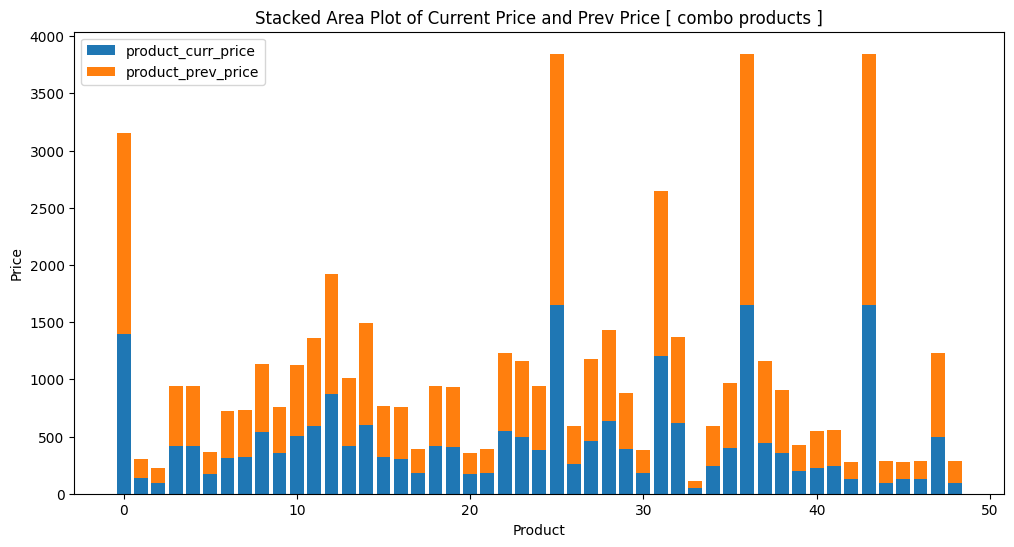

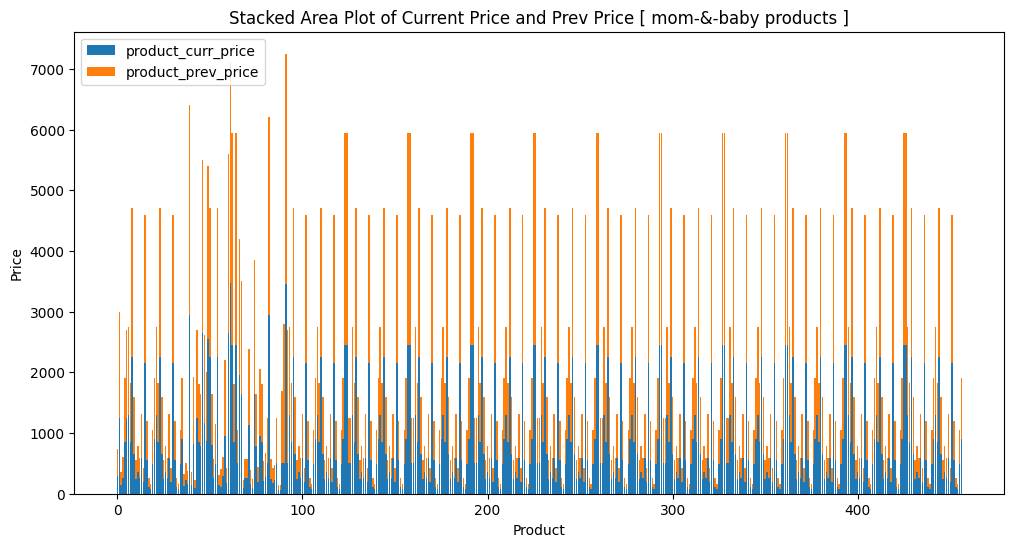

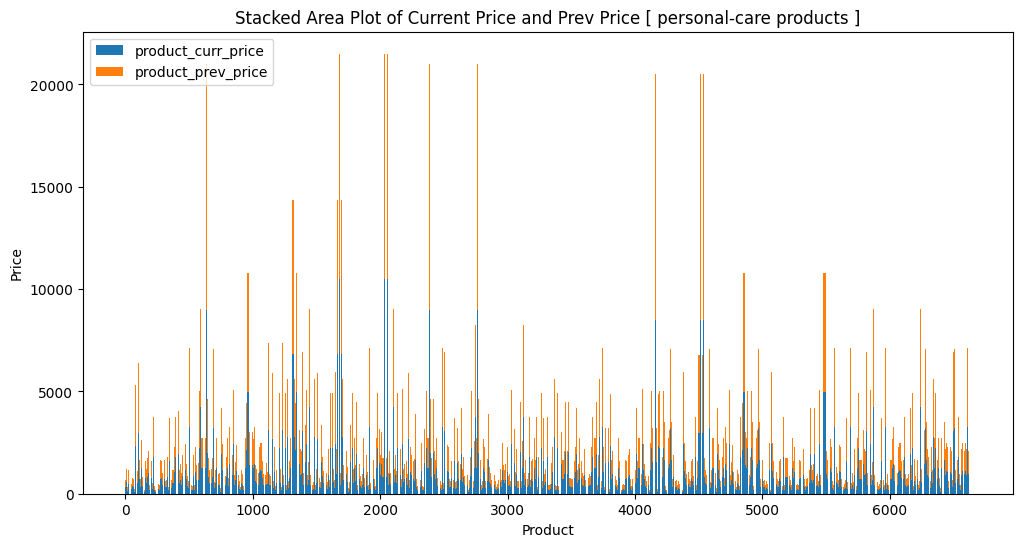

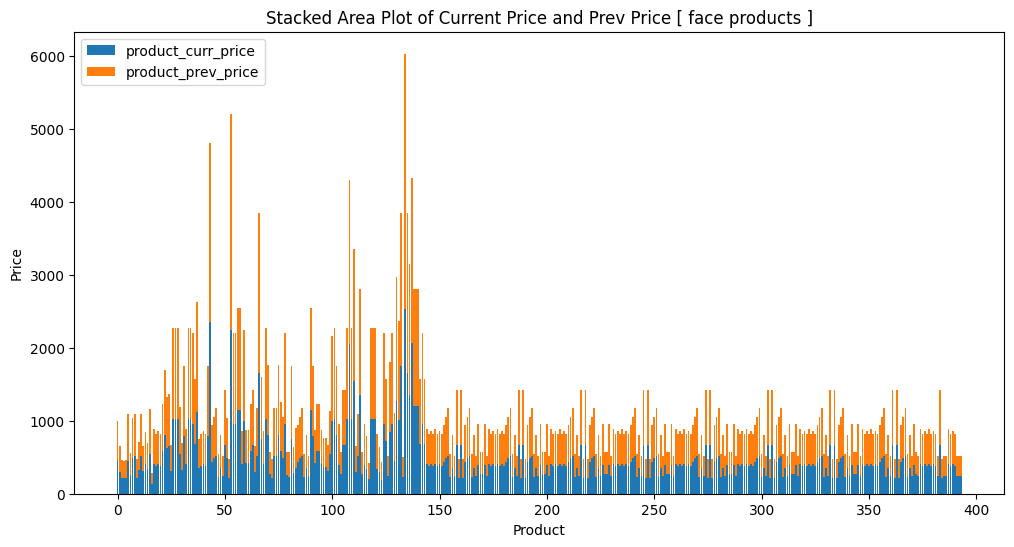

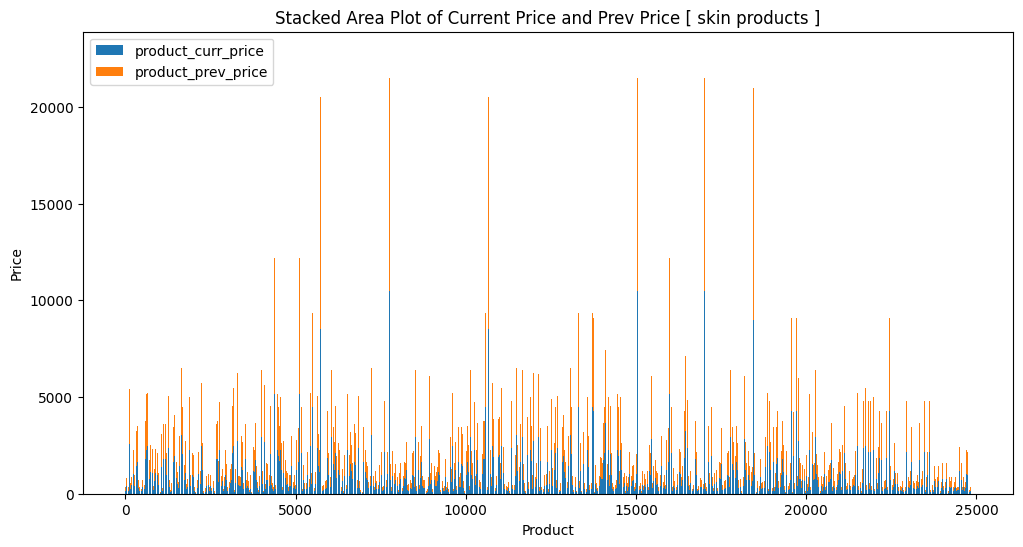

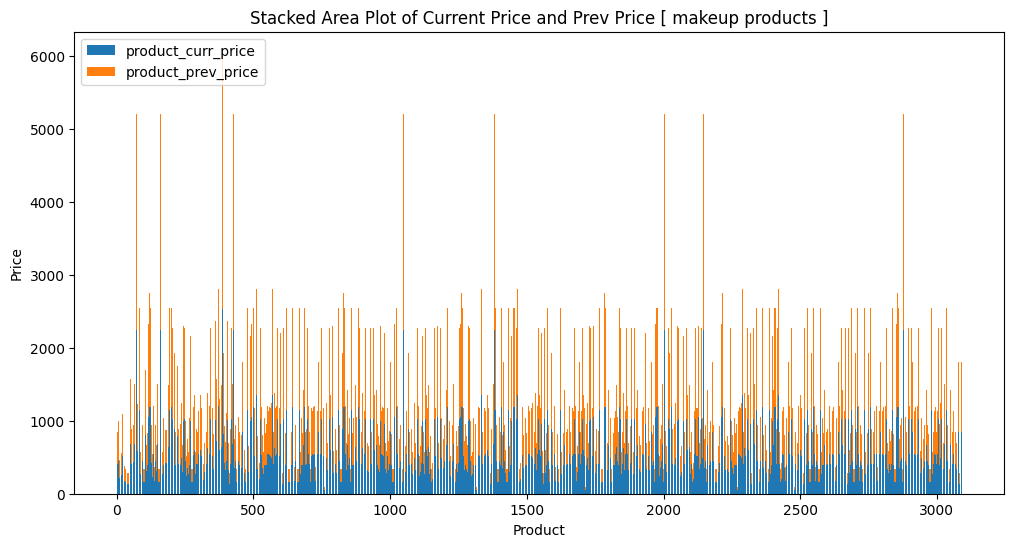

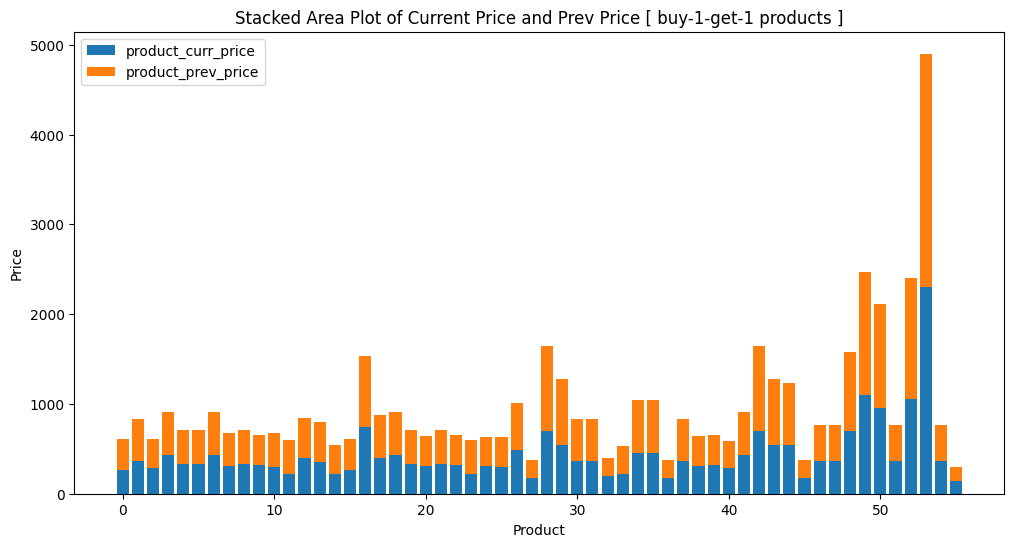

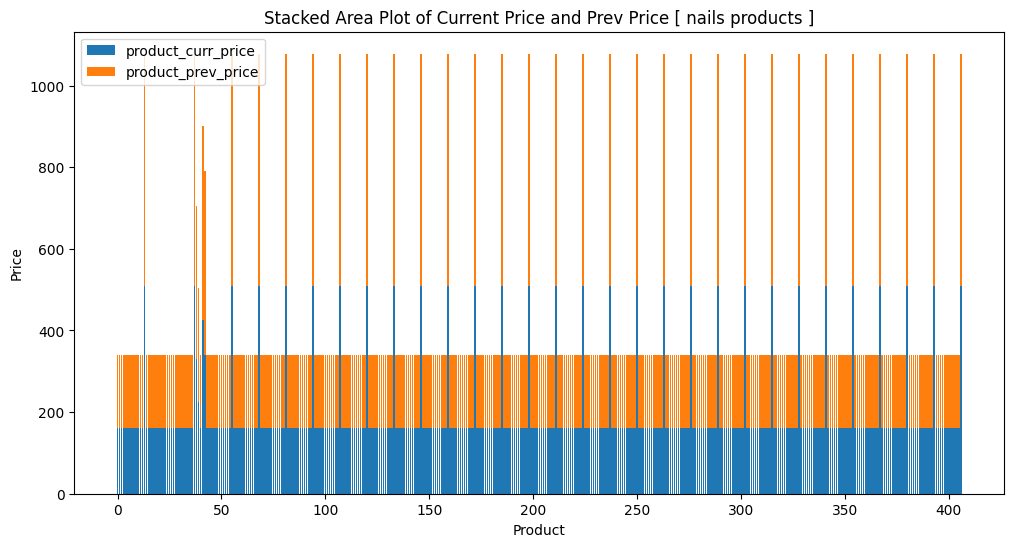

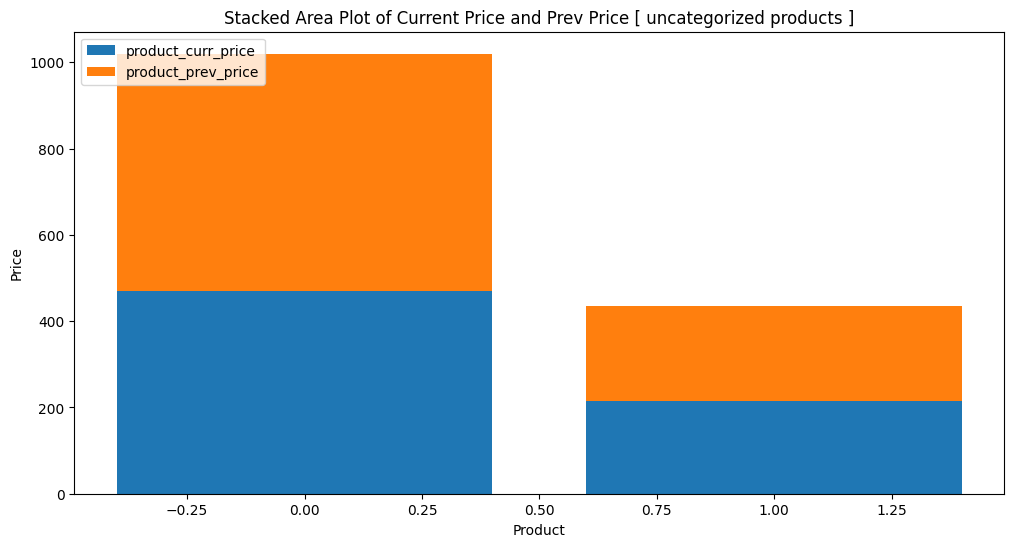

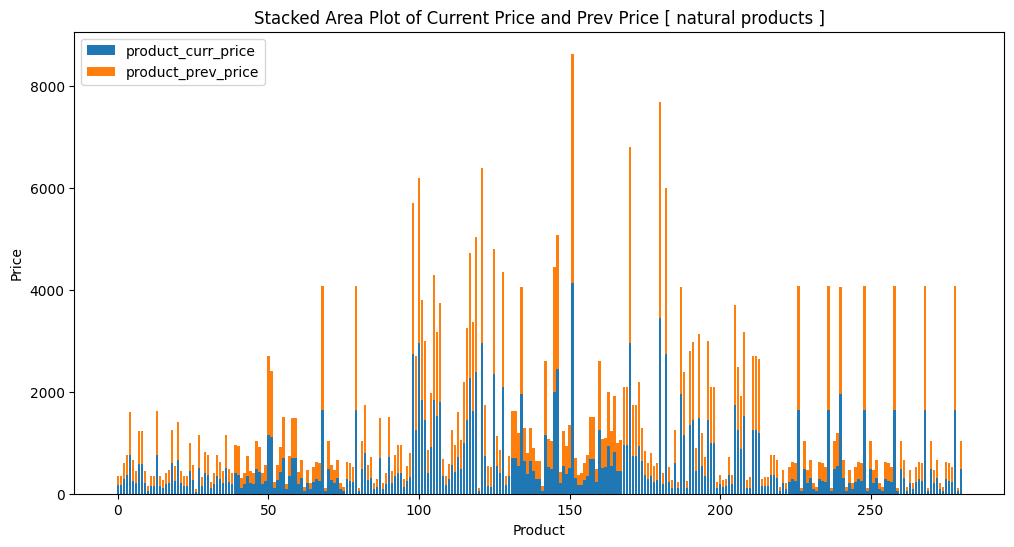

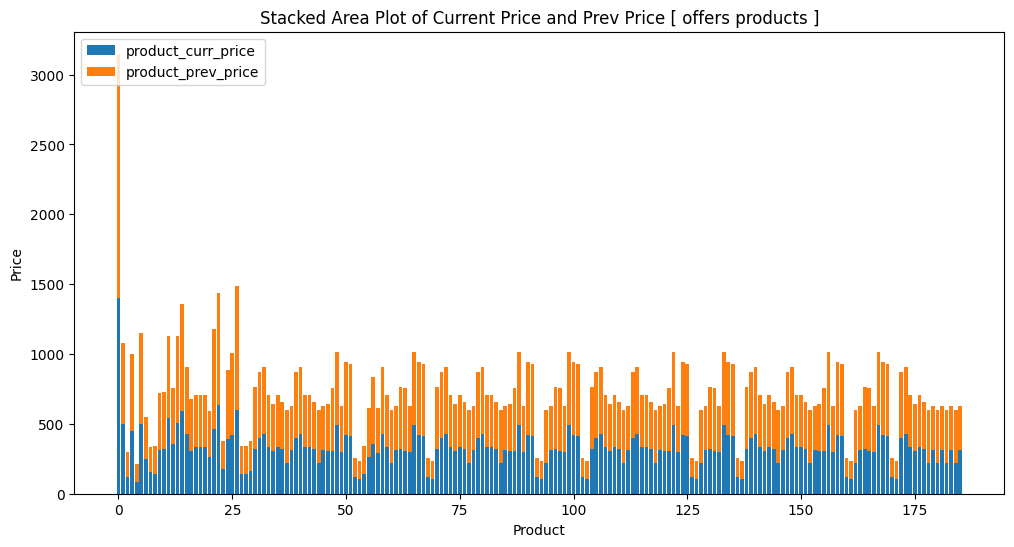

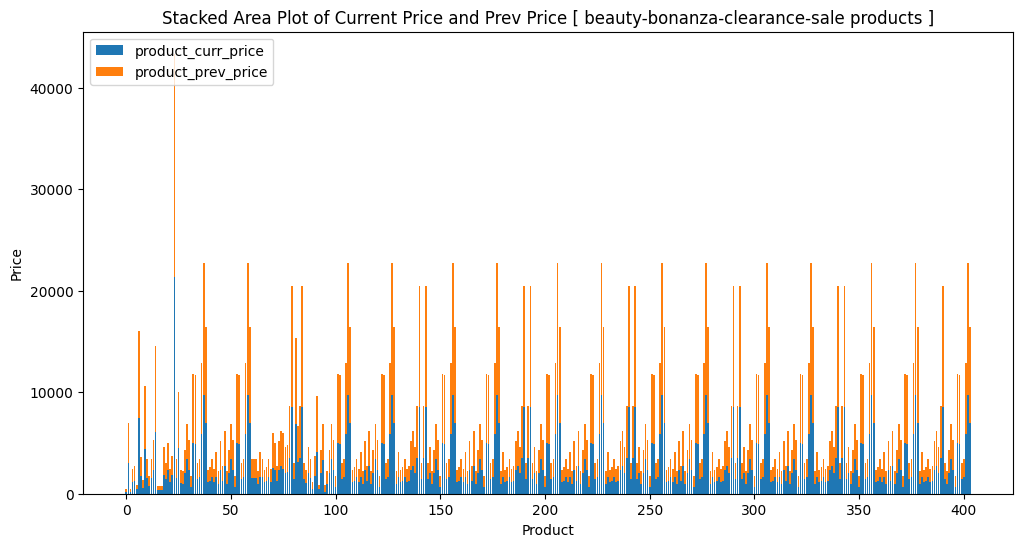

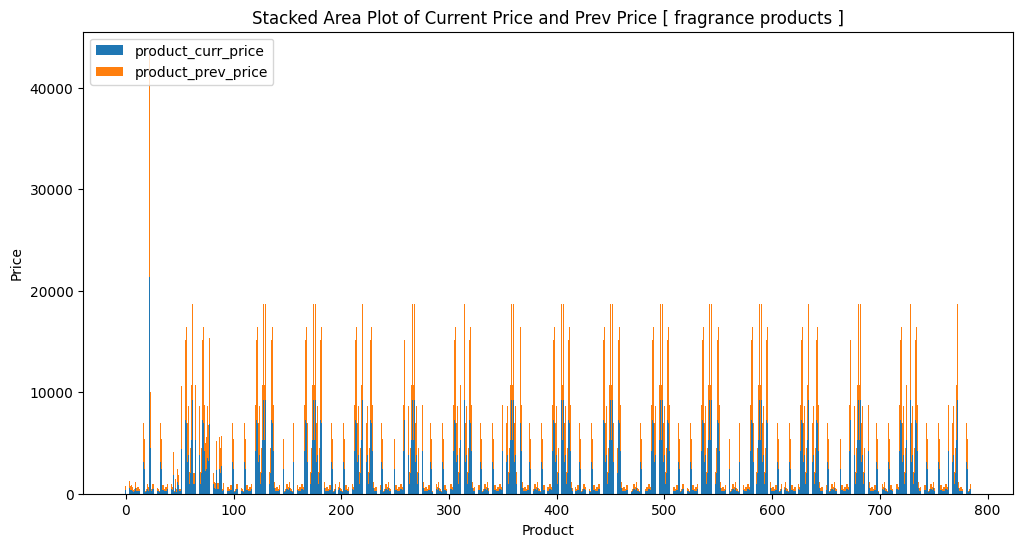

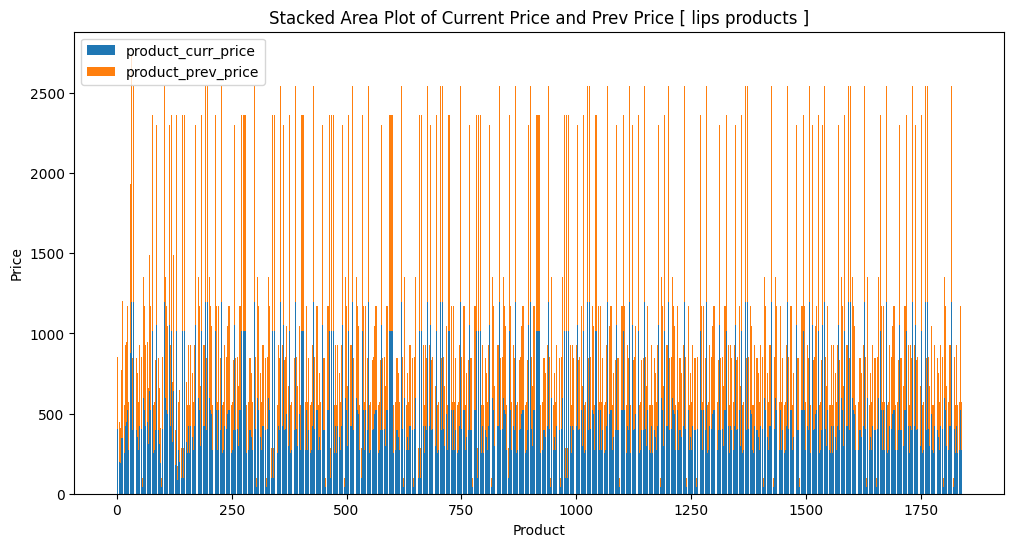

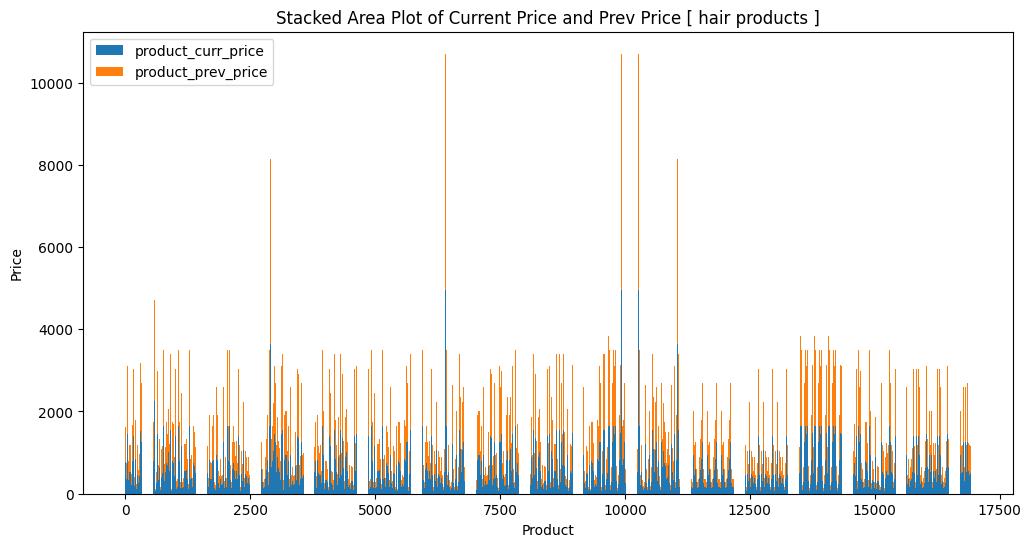

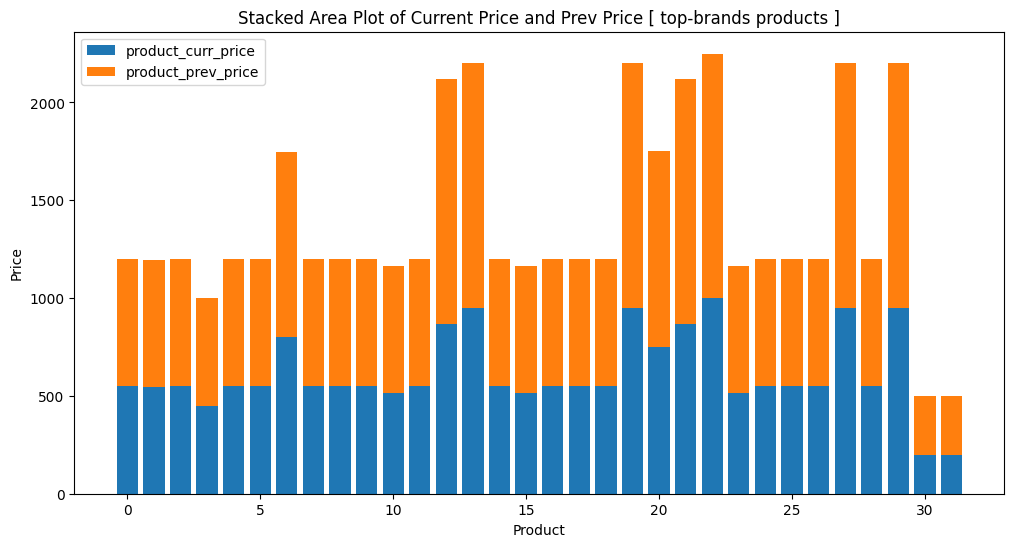

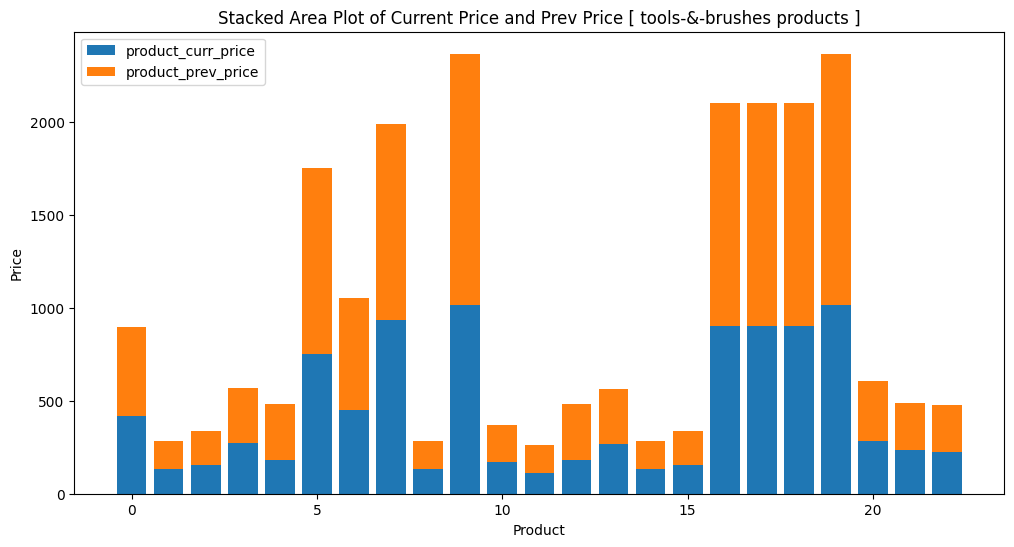

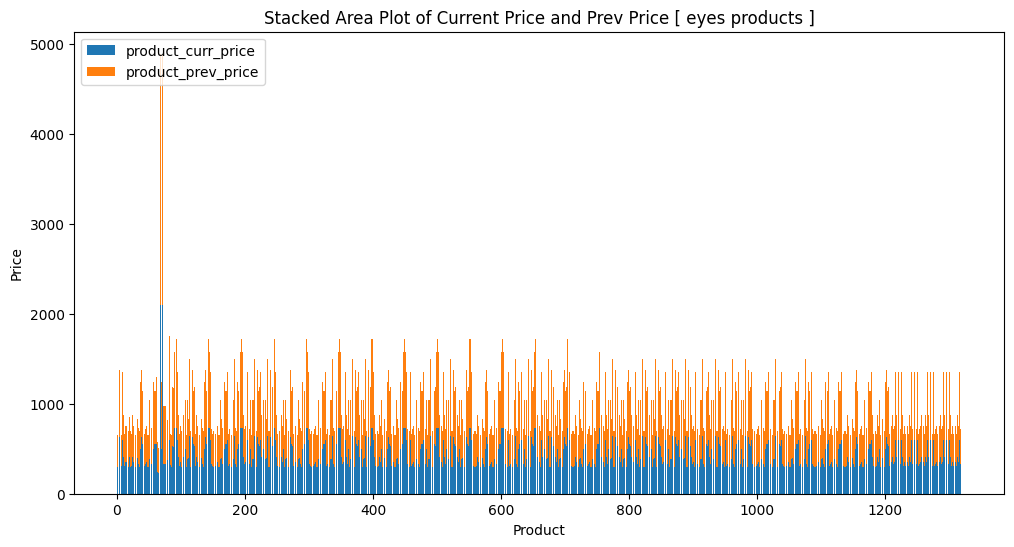

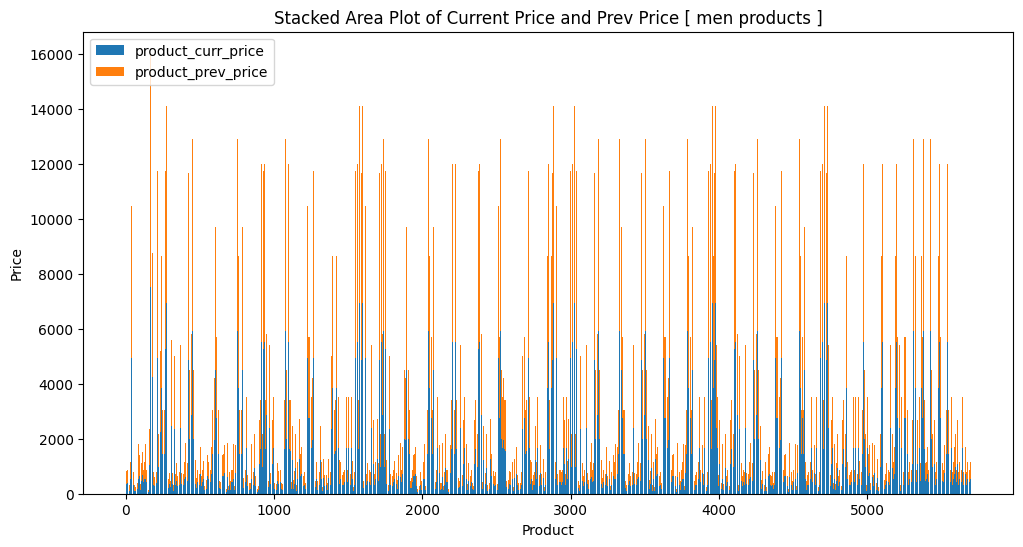

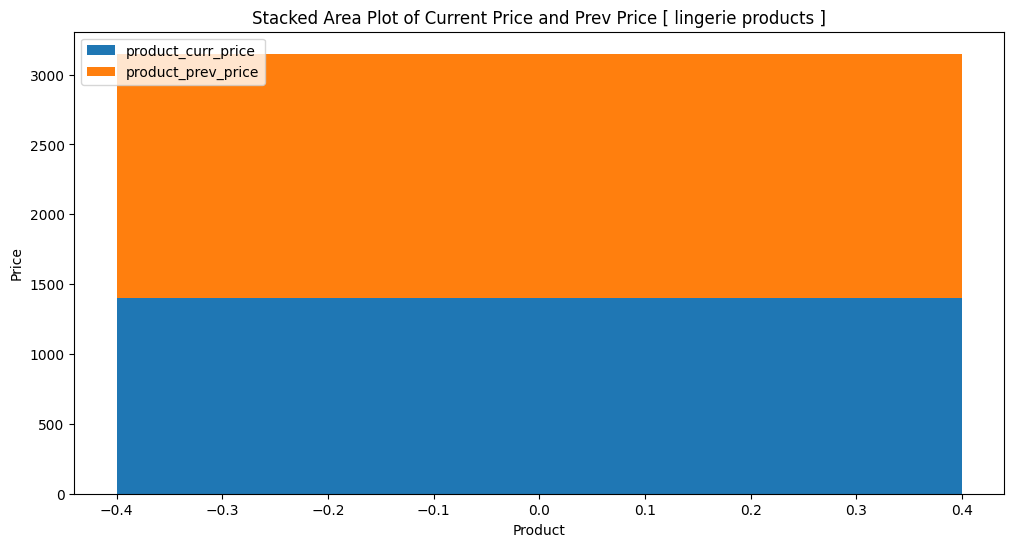

In [ ]:
import pandas as pd

import os
print(os.listdir())
files = [file for file in os.listdir() if file.endswith('.csv')]
print(len(files))
total_records = 0
if not os.path.exists('cur_vs_prev'):
  os.mkdir('cur_vs_prev')
for file in files:
  df = pd.read_csv(file)
  if df['product_prev_price'].count() == 0:
    continue
  file_name = file.replace('_cleaned.csv', '')
  file_name = ' '.join(file_name.split('_'))
  df['product_curr_price'] = pd.to_numeric(df['product_curr_price'], errors='coerce')
  df['product_prev_price'] = pd.to_numeric(df['product_prev_price'], errors='coerce')
  df = df.dropna(subset=['product_curr_price', 'product_prev_price'])
  x = range(len(df))

  plt.figure(figsize=(12,6))
  plt.bar(x, df['product_curr_price'], label='product_curr_price')
  plt.bar(x, df['product_prev_price'], bottom=df['product_curr_price'], label="product_prev_price")
  plt.legend(loc='upper left')
  plt.title(f'Stacked Area Plot of Current Price and Prev Price [ {file_name} ]')
  plt.xlabel('Product')
  plt.ylabel('Price')
  plt.savefig(f"cur_vs_prev/{file_name}_prev_vs_curr.png")
  plt.show()